図14.2, 14.3, 14.4, 14.5

In [1]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [2]:
#マスーばねーダンパシステムの定義
M = 1.0
D = 5.0
K = 6.0
A = np.array([[0.0, 1.0], [-K/M,-D/M]]) #行列A
b = np.array([[0.0], [1/M]]) #ベクトルb
c = np.array([[1.0, 0.0]]) #ベクトルc
d = 0 #スカラーd

In [3]:
poles1 = [-3.0, -3.0] #閉ループシステムの極の指定
f1 = matlab.acker(A, b, poles1) #フィードバックゲインを求める
print("feedback gain =", f1) #フィードバックゲインの表示

feedback gain = [[3. 1.]]


In [4]:
Af1 = A - b*f1 #Af = A-bfの計算
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにCを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてDは零ベクトルとする

sys_s_fbk1 = matlab.ss(Af1, b, cp, dp) #フィードバック系の状態空間表現を求める
(y_s_fbk1, t_s_fbk1) = matlab.initial(sys_s_fbk1, X0 = np.array([[-1.0],[0.0]]), T = arange(0, 5, 0.01)) #フィードバック系の初期値応答を求める

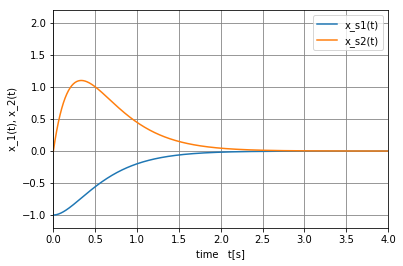

In [5]:
# 図14.2(a)の描画
plt.plot(t_s_fbk1, y_s_fbk1[:,0], label = "x_s1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_s_fbk1, y_s_fbk1[:,1], label = "x_s2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,4]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 2.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_1(t), x_2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

In [6]:
poles2 = [-5.0, -5.0]
f2 = matlab.acker(A, b, poles2)
print("feedback gain =", f2)

feedback gain = [[19.  5.]]


In [7]:
Af2 = A - b*f2
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにCを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてDは零ベクトルとする
sys_s_fbk2 = matlab.ss(Af2, b, cp, dp)
(y_s_fbk2, t_s_fbk2) = matlab.initial(sys_s_fbk2, X0 = np.array([[-1.0],[0.0]]), T = arange(0, 5, 0.01))

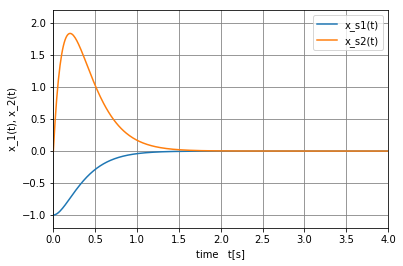

In [8]:
# 図14.2(b)の描画
plt.plot(t_s_fbk2, y_s_fbk2[:,0], label = "x_s1(t)")#FBによるx_{1}を抽出してplotする
plt.plot(t_s_fbk2, y_s_fbk2[:,1], label = "x_s2(t)")#FBによるx_{2}を抽出してplotする
plt.xlim([0,4]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.2, 2.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_1(t), x_2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

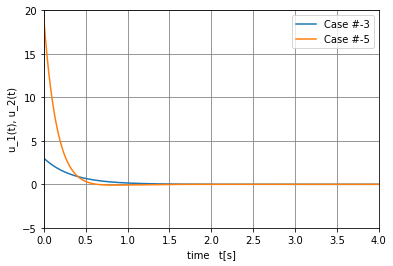

In [9]:
#図14.3の描画
u1 = - f1[:,0]*y_s_fbk1[:,0] - f1[:,1]*y_s_fbk1[:,1] #Case #-3の場合の入力の計算
u2 = - f2[:,0]*y_s_fbk2[:,0] - f2[:,1]*y_s_fbk2[:,1] #Case #-5の場合の入力の計算
plt.plot(t_s_fbk1, u1.T, label = "Case #-3")
plt.plot(t_s_fbk2, u2.T, label = "Case #-5")
plt.xlim([0,4]) #横軸（時間軸）の範囲の指定
plt.ylim([-5, 20]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("u_1(t), u_2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

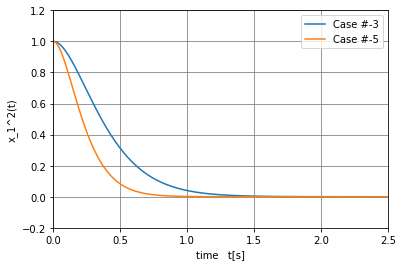

In [10]:
# 図14.5(a)の描画
y_s_fbk112 = np.power(y_s_fbk1[:,0],2)
y_s_fbk212 = np.power(y_s_fbk2[:,0],2)
plt.plot(t_s_fbk1, y_s_fbk112, label = "Case #-3")#Case #-3のx_{1}を2乗してplotする
plt.plot(t_s_fbk1, y_s_fbk212, label = "Case #-5")#FCase #-5のx_{1}を2乗してplotする
plt.xlim([0,2.5]) #横軸（時間軸）の範囲の指定
plt.ylim([-0.2, 1.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_1^2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

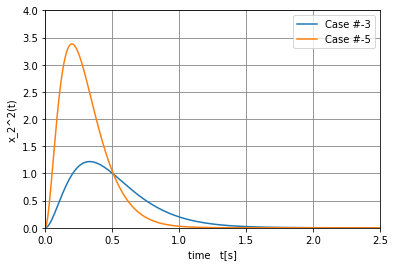

In [11]:
# 図14.5(b)の描画
y_s_fbk122 = np.power(y_s_fbk1[:,1],2)
y_s_fbk222 = np.power(y_s_fbk2[:,1],2)
plt.plot(t_s_fbk1, y_s_fbk122, label = "Case #-3")#Case #-3のx_{2}を2乗してplotする
plt.plot(t_s_fbk1, y_s_fbk222, label = "Case #-5")#Case #-5のx_{2}を2乗してplotする
plt.xlim([0,2.5]) #横軸（時間軸）の範囲の指定
plt.ylim([0, 4]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_2^2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

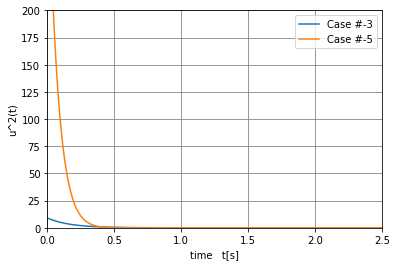

In [12]:
#図14．5（c）の描画
u12 = np.power(u1,2)
u22 = np.power(u2,2)
plt.plot(t_s_fbk1, u12.T, label = "Case #-3")
plt.plot(t_s_fbk1, u22.T, label = "Case #-5")
plt.xlim([0,2.5]) #横軸（時間軸）の範囲の指定
plt.ylim([0, 200]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("u^2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示